# **ML Pipeline Setup**

In [ ]:
# Visualization and Mathematical computations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Supervised Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Unsupervised Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Dimensionality Reduction & Feature Selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Model Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#  **Data Preprocessing & Cleaning**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
# Load individual datasets and treat '?' as missing values
df_cleveland = pd.read_csv("heart+disease/processed.cleveland.data", names=columns, na_values="?")
df_hungarian = pd.read_csv("heart+disease/processed.hungarian.data", names=columns, na_values="?")
df_va = pd.read_csv("heart+disease/processed.va.data", names=columns, na_values="?")
df_switzerland = pd.read_csv("heart+disease/processed.switzerland.data", names=columns, na_values="?")
df_all = pd.concat([df_cleveland, df_hungarian, df_va, df_switzerland], ignore_index=True)
print("Combined shape:", df_all.shape)
df_all.head() # designed to only show first 5 rows


Combined shape: (920, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# remove the data that has missing values.
df_all_clean = df_all.dropna()
df_all_clean.shape

(299, 14)

In [ ]:
'''
One-hot encoding converts categorical variables into a format that machine learning algorithms can understand
cp = [0, 1, 2, 3]
These are categories, not quantities — cp=3 isn’t “more” than cp=1.
treat numbers as having mathematical meaning. If you use cp=0, cp=1, cp=2 as-is,
the model may think there's an order or distance between them (which is wrong for categories).
'''
df_all_clean = pd.get_dummies(df_all_clean, columns=["cp", "restecg", "slope", "ca", "thal"])
df_all_clean.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False


In [ ]:
X = df_all_clean.drop("target", axis=1)
y = df_all_clean["target"]
# each column has:Mean ≈ 0 Standard deviation ≈ 1
X_scaled = StandardScaler().fit_transform(X) # It returns a NumPy array, not a DataFrame.
#convert X_scaled back to a DataFrame so you can: Preserve column names,NumPy arrays don’t have feature names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


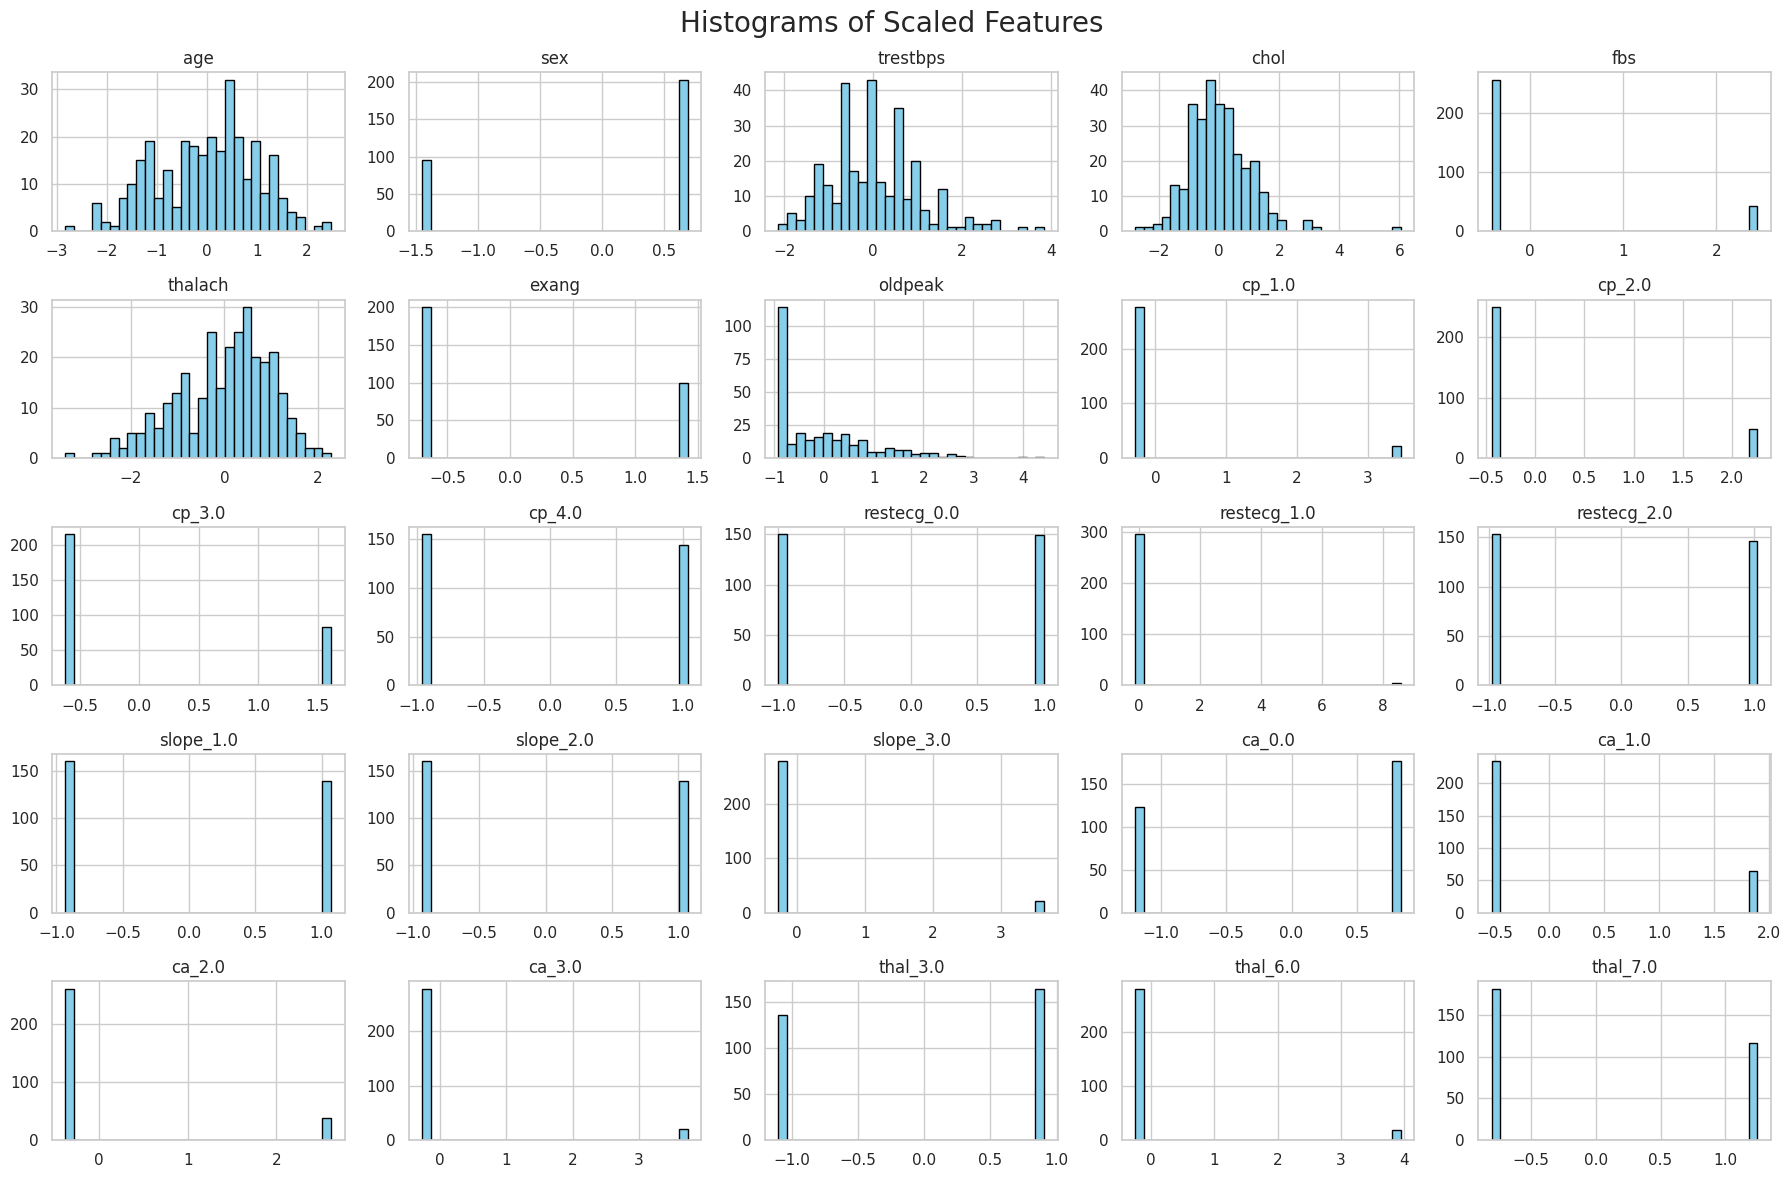

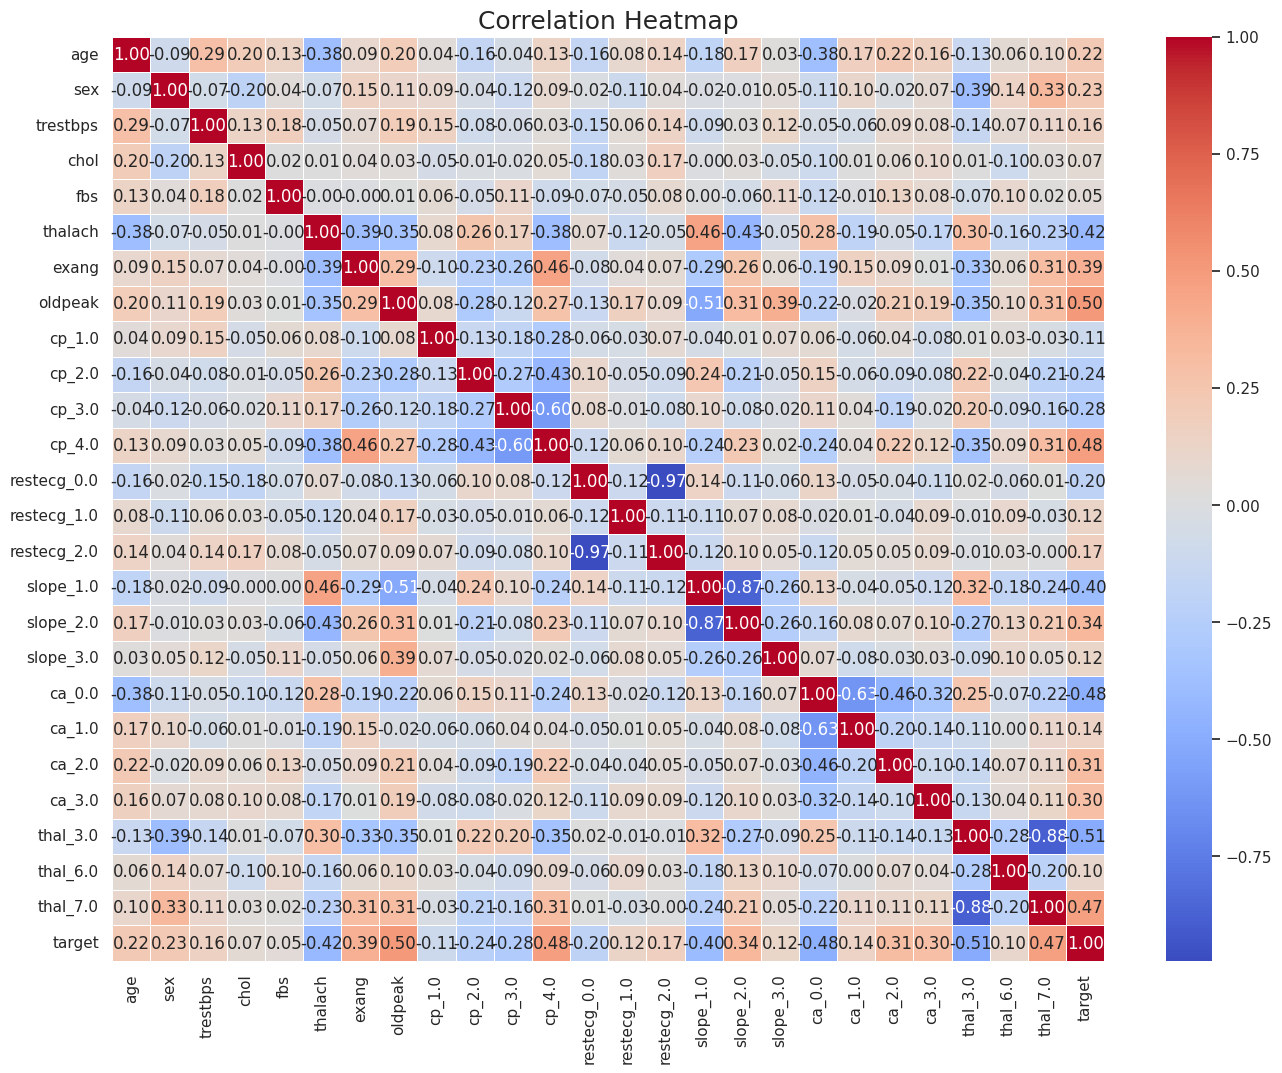

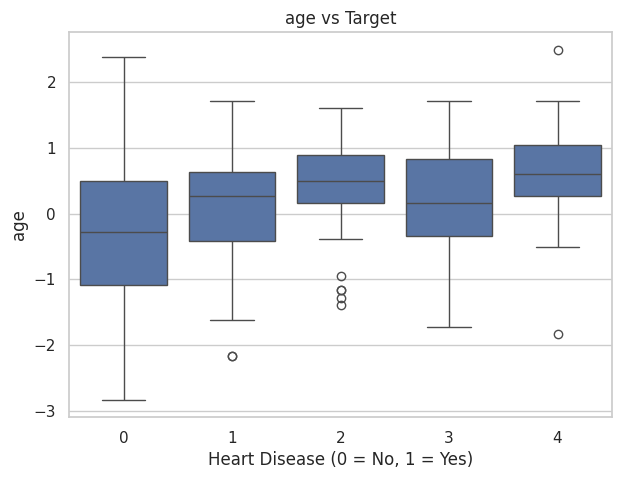

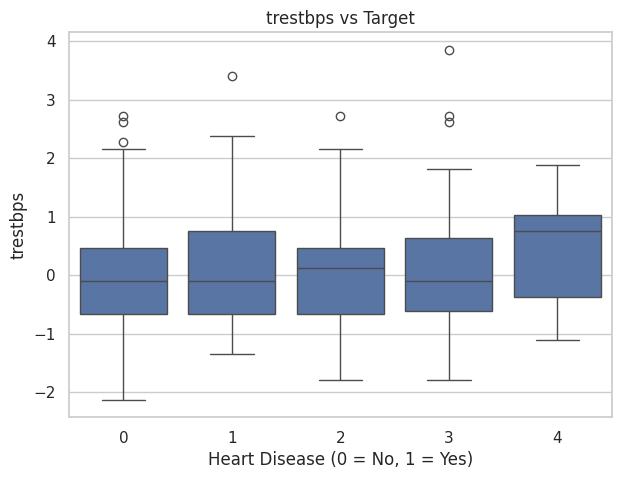

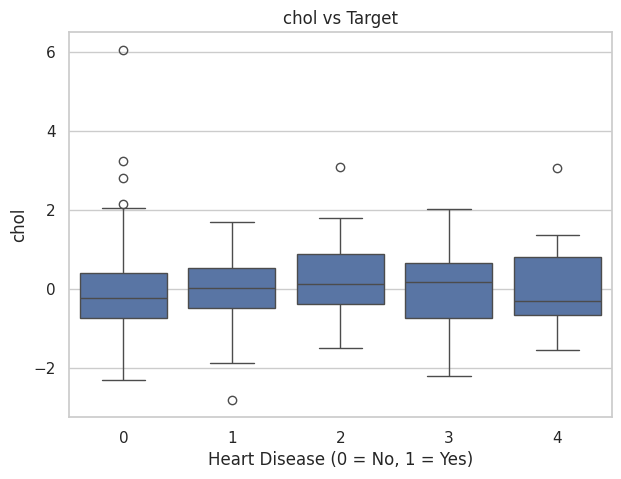

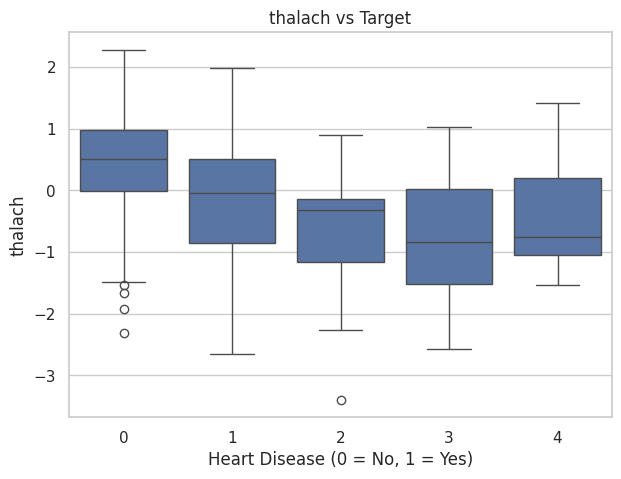

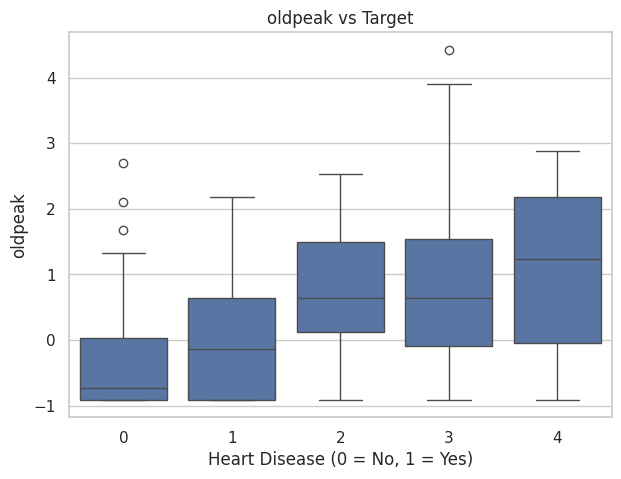

In [ ]:
# Combine scaled features and target into one DataFrame
df_eda = X_scaled.copy()
df_eda["target"] = y.values

sns.set(style="whitegrid")

# 1. Histograms
df_eda.drop("target", axis=1).hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Scaled Features', fontsize=20)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df_eda.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# 3. Boxplots: Feature vs Target
important_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for feature in important_features:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="target", y=feature, data=df_eda)
    plt.title(f"{feature} vs Target")
    plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.show()


# Dimensionality Reduction - PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 18


In [ ]:
# Apply PCA with optimal components
pca_opt = PCA(n_components=18)
X_pca_opt = pca_opt.fit_transform(X_scaled)

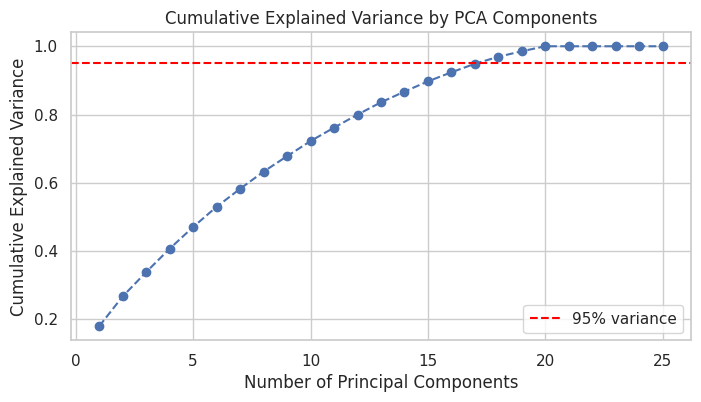

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

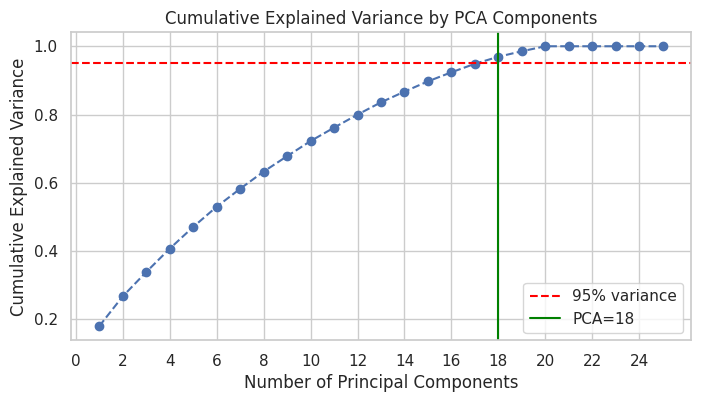

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% variance')
plt.axvline(x=18, color='green', linestyle='-', label='PCA=18') # Horizontal line at PCA=18
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(cumulative_variance) + 1, step=2)) # Set x-axis ticks
plt.show()

# Feature Selection

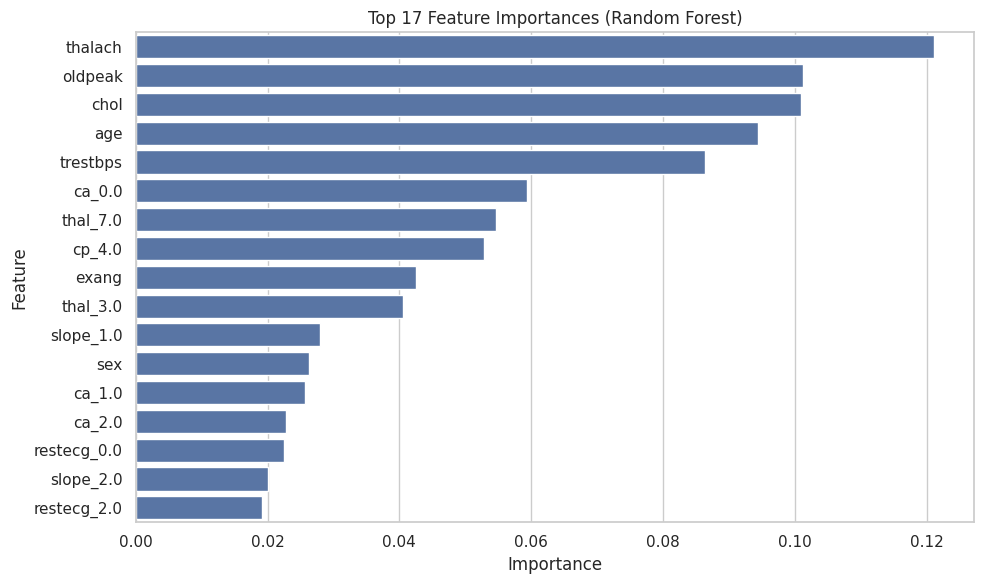

In [98]:
# Fit model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

# Get the importance of each feature
importances = rf.feature_importances_ #This extracts the importance score of each feature from the trained Random Forest model
feature_names = X_scaled.columns if isinstance(X_scaled, pd.DataFrame) else [f"f{i}" for i in range(X_scaled.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
# show for example the first 17 feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df.head(17))
plt.title('Top 17 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [96]:
from sklearn.feature_selection import RFE
# Create base model
model = LogisticRegression(max_iter=1000)

# RFE with top 10 features (you can adjust)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Get selected features
selected_features = [feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected features by RFE:", selected_features)


Selected features by RFE: ['age', 'thalach', 'oldpeak', 'cp_1.0', 'cp_4.0', 'restecg_0.0', 'slope_1.0', 'ca_0.0', 'ca_2.0', 'thal_7.0']


In [99]:
X_chi2 = MinMaxScaler().fit_transform(X_scaled)

chi2_selector = SelectKBest(score_func=chi2, k=10)  # select top 10
chi2_selector.fit(X_chi2, y)
chi2_features = [feature_names[i] for i in chi2_selector.get_support(indices=True)]
print("Top 10 features by Chi-Square Test:", chi2_features)

Top 10 features by Chi-Square Test: ['exang', 'cp_3.0', 'cp_4.0', 'slope_1.0', 'slope_2.0', 'ca_0.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_7.0']


In [101]:
# Step 1: Get intersection between RFE and Chi-Square
intersect_features = list(set(selected_features) & set(chi2_features))

# Step 2: Add 'age', 'thalach', and 'chol' if not already included
additional = ['age', 'thalach', 'chol']
for feature in additional:
    if feature not in intersect_features:
        intersect_features.append(feature)

# Final list
final_features = intersect_features

print("Final selected features for modeling:", final_features)

# Step 3: Build final X_selected DataFrame
X_selected = pd.DataFrame(X_scaled, columns=feature_names)[final_features]


Final selected features for modeling: ['thal_7.0', 'ca_2.0', 'slope_1.0', 'cp_4.0', 'ca_0.0', 'age', 'thalach', 'chol']
